<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_03_cnns/CNN_Keras_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Redes Neurais Convolucionais (*Convolutional Neural Networks - CNN*)

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Aula 03: CNNs


Começaremos nosso exemplo teste fazendo a requisição dos pacotes que necessitamos para manipular os modelos de Aprendizado Profundo (*Deep Learning - DL*), no caso as CNNs. Iremos fazer uso de um pacote em especial:
* **keras** - wrapper em R das implementações de DL em Python.

Links externos: 

* Keras: https://keras.io

* keras - pacote R: https://cran.r-project.org/web/packages/kerasR/vignettes/introduction.html


In [42]:
# 1. Instalar o pacote keras, caso não existe, e carregá-lo no nosso ambiente

install.packages("keras")
library("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#1 - Selecionar um conjunto de dados 

Iremos trabalhar com um conjunto de dados (*dataset*) composto por imagens. O dataset selecionado para esse exemplo é o [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Este dataset é composto por 
60 mil imagens, cuja resolução é 32 x 32, dividas em 10 categorias, incluindo imagens de objetos e animais. As 10 categorias existentes no CIFAR-10 são:
* classes = {avião, automóvel, pássaro, gato, veado, cachorro, sapo, cavalo, navio, e caminhão}.

In [24]:
# carregar o dataset CIFAR-10 do pacote keras
cifar = keras::dataset_cifar10()

Além do cifar, existem outros dataset já pré-carregados no pacote:'dataset_boston_housing()', 'dataset_cifar100()'; 'dataset_fashion_mnist()', 'dataset_imdb()', 'dataset_mnist()', 'dataset_reuters()'.

Dentro variável ```cifar``` teremos quatro conjuntos de dados:
* ```train$x```: conjunto de treinamento e seus respectivos atributos descritivos (pixels de cada imagem);
* ```test$y```: labels do conjunto de treinamento;
* ```train$x```: conjunto de teste e seus respectivos atributos descritivos;
* ```test$y```: labels do conjunto de teste.

Os conjuntos 'x' são arrays de imagens em RBB com dimensão: (num_samples, 32, 32, 3). Já os conjuntos 'y' são arrays categóricos com valores de 0-9, no tamanho (num_samples).


In [69]:
# Conjunto de treinamento (train$x)
# 50000 imagens no conjunto de treinamento, 32x32, 3 canais de cores (matrizes R, G, B)
str(cifar$train$x)

 int [1:50000, 1:32, 1:32, 1:3] 59 154 255 28 170 159 164 28 134 125 ...


In [61]:
# Tentando ver a informação de uma imagem
# imagem 1 - canal R
print(cifar$train$x[1,,,1])
# imagem 1 - canal G
#print(cifar$train$x[1,,,1])
# imagem 1 - canal B
#print(cifar$train$x[1,,,1])


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]   59   43   50   68   98  119  139  145  149   149   131   125   142
 [2,]   16    0   18   51   88  120  128  127  126   116   106   101   105
 [3,]   25   16   49   83  110  129  130  121  113   112   112   106   105
 [4,]   33   38   87  106  115  117  114  105  107   121   125   109   113
 [5,]   50   59  102  127  124  121  120  114  107   125   129   106   108
 [6,]   71   84  110  129  136  131  129  119  108   122   123   105   107
 [7,]   97  111  123  130  136  132  122  121  127   138   124   120   107
 [8,]  115  119  130  140  133  127  138  137  131   133   134   108    72
 [9,]  137  128  132  128  119  123  128  130  121   137   131    74    54
[10,]  154  154  156  140  123  125  126  127  133   132    90    63    62
[11,]  154  155  156  147  133  137  139  134  141   121    80    97    90
[12,]  145  146  146  135  127  129  117  103  130   120   111   146   136
[13,]  142  141  140  144

In [68]:
# Rotulos do conjunto de treinamento (train$x) 
str(cifar$train$y)

 int [1:50000, 1] 6 9 9 4 1 1 2 7 8 3 ...


In [46]:
# vendo a distribuição de valores das classes no conjunto de treinamento
table(cifar$train$y)


   0    1    2    3    4    5    6    7    8    9 
5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 

Algumas características do dataset carregado:


In [64]:
str(cifar$test$x)

 int [1:10000, 1:32, 1:32, 1:3] 158 235 158 155 65 179 160 83 23 217 ...


Os correspondetes nomes das classes são:

In [83]:
class_names = c('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(class_names)

 [1] "airplane"   "automobile" "bird"       "cat"        "deer"      
 [6] "dog"        "frog"       "horse"      "ship"       "truck"     


#2 - Visualizar nossos dados

Podemos tentar visualizar um pouco dos dados que estamos manipulando. Logo, seria interessante "ver" estas imagens e como elas diferem entre si. Como temos 50 mil exemplos no conjunto de treinamento vamos selecionar um pequeno subconjunto de 30 imagens e verificar os seus respectivos rótulos (labels/classes).

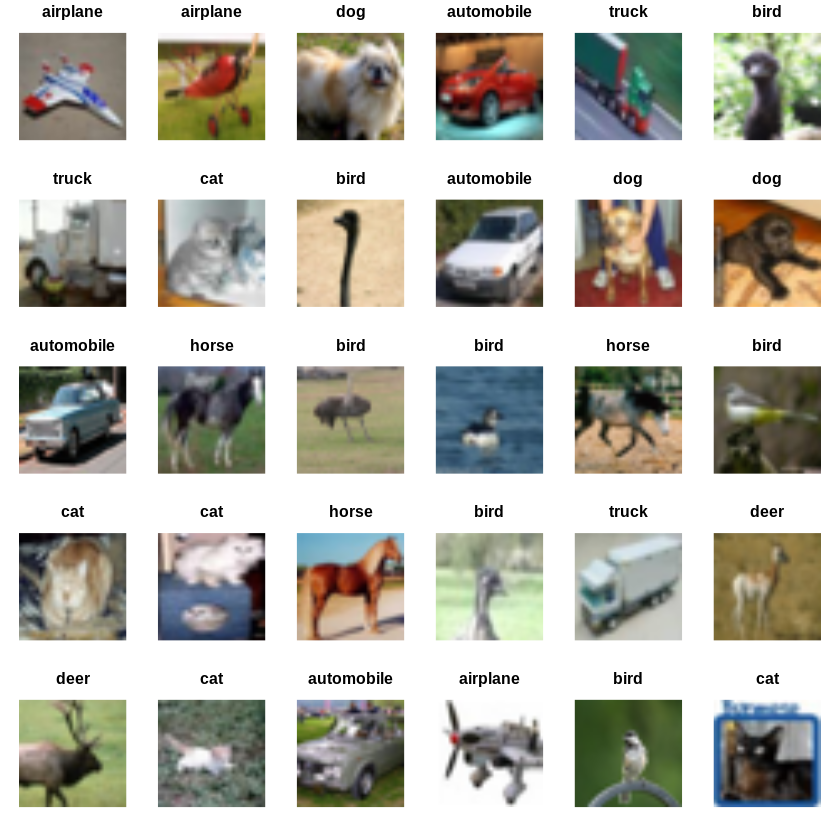

In [82]:
# selecionaremos 30 imagens
index = 1:30
#index = 31:60
#...

# e as mostraremos em um grid 5 x 6 - 5 linhas, 6 colunas
par(mfcol = c(5,6), mar = rep(1, 4), oma = rep(0.2, 4))

cifar$train$x[index,,,] %>% 
  purrr::array_tree(1) %>%
  purrr::set_names(class_names[cifar$train$y[index] + 1]) %>% 
  purrr::map(as.raster, max = 255) %>%
  purrr::iwalk(~{plot(.x); title(.y)})

Seria interessante analisar também qual é a distribução das classes do problema. Podemos gerar um histograma para verificar a frequência de cada uma das classes:

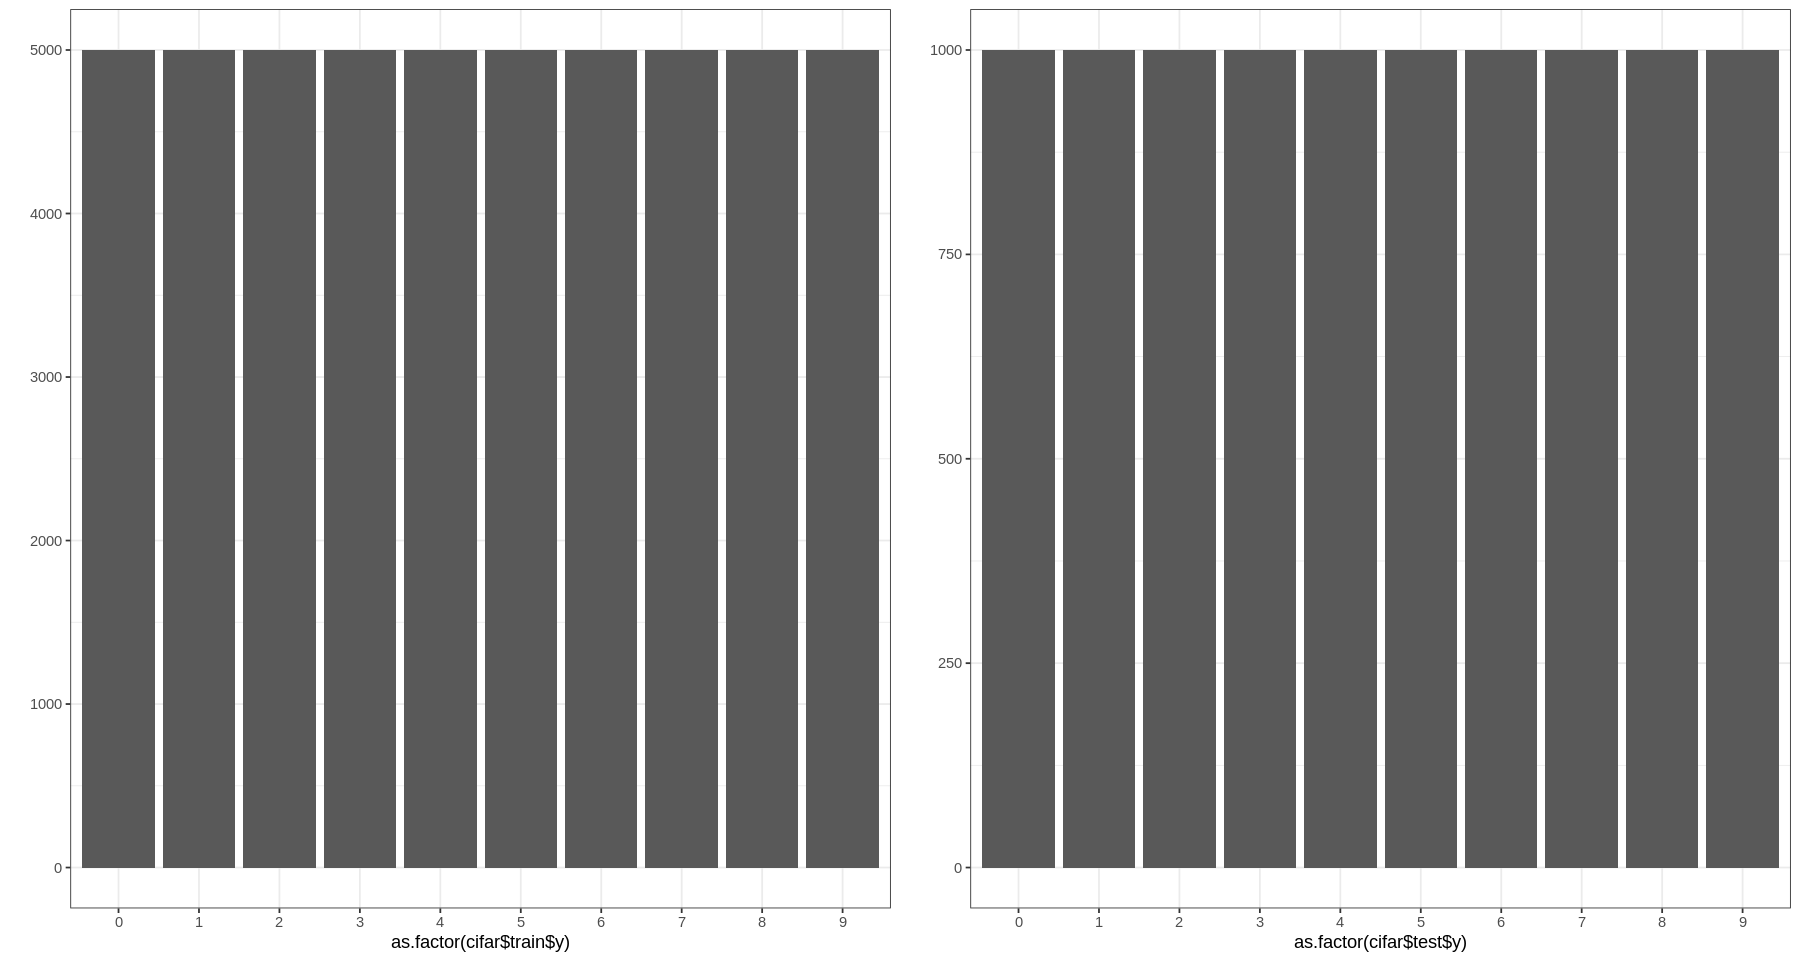

In [96]:
# gráfico com a distribuição das classes
library('ggplot2')
#install.packages('gridExtra') # se nao estiver instalado
library('gridExtra')

# histograma das classes no conjunto de treinamento
q1 = qplot(as.factor(cifar$train$y)) + theme_bw()

# histograma das classes no conjunto de teste
q2 = qplot(as.factor(cifar$test$y)) + theme_bw()

# plot duplo (treino - teste)
options(repr.plot.width=15, repr.plot.height=8)
gridExtra::grid.arrange(q1, q2, ncol=2)


Para nosso conjunto de teste:

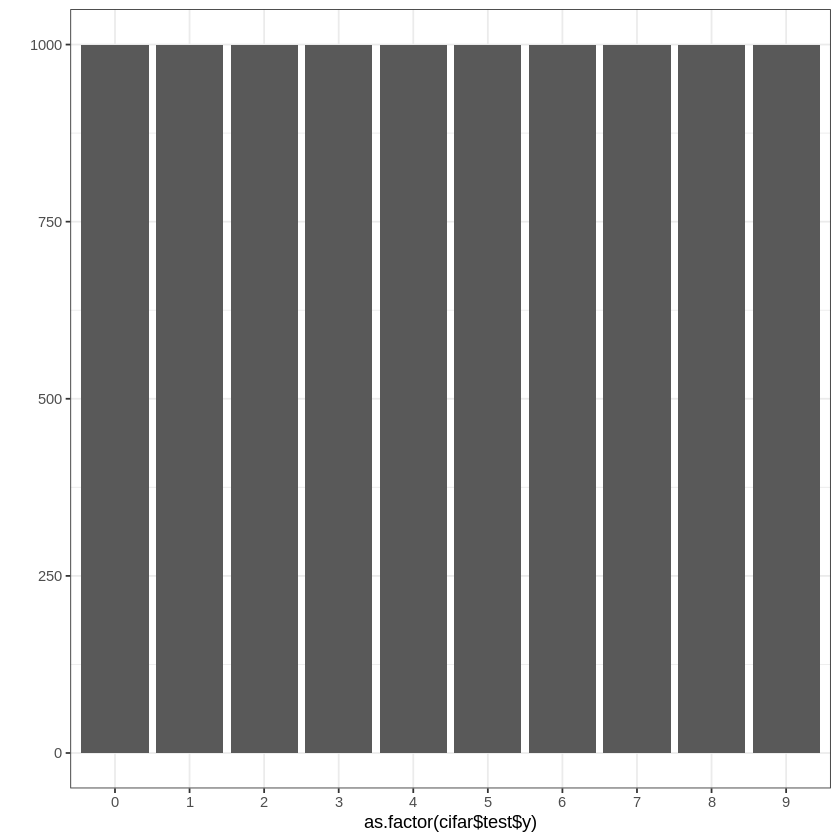

#3 - Criando um modelo de CNN

In [31]:
model <- keras_model_sequential() %>% 
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = "relu", 
                input_shape = c(32,32,3)) %>% 
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = "relu") %>% 
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = "relu")

In [32]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_2 (Conv2D)                   (None, 30, 30, 32)              896         
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 15, 15, 32)              0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 13, 13, 64)              18496       
________________________________________________________________________________
max_pooling2d (MaxPooling2D)        (None, 6, 6, 64)                0           
________________________________________________________________________________
conv2d (Conv2D)                     (None, 4, 4, 64)                36928       
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
___________________

In [33]:
model %>% 
  layer_flatten() %>% 
  layer_dense(units = 64, activation = "relu") %>% 
  layer_dense(units = 10, activation = "softmax")

In [34]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_2 (Conv2D)                   (None, 30, 30, 32)              896         
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 15, 15, 32)              0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 13, 13, 64)              18496       
________________________________________________________________________________
max_pooling2d (MaxPooling2D)        (None, 6, 6, 64)                0           
________________________________________________________________________________
conv2d (Conv2D)                     (None, 4, 4, 64)                36928       
________________________________________________________________________________
flatten 

In [35]:
model %>% compile(
  optimizer = "adam",
  loss = "sparse_categorical_crossentropy",
  metrics = "accuracy"
)

In [36]:
history <- model %>% 
  fit(
    x = cifar$train$x, y = cifar$train$y,
    epochs = 10,
    validation_data = unname(cifar$test),
    verbose = 2
  )

`geom_smooth()` using formula 'y ~ x'



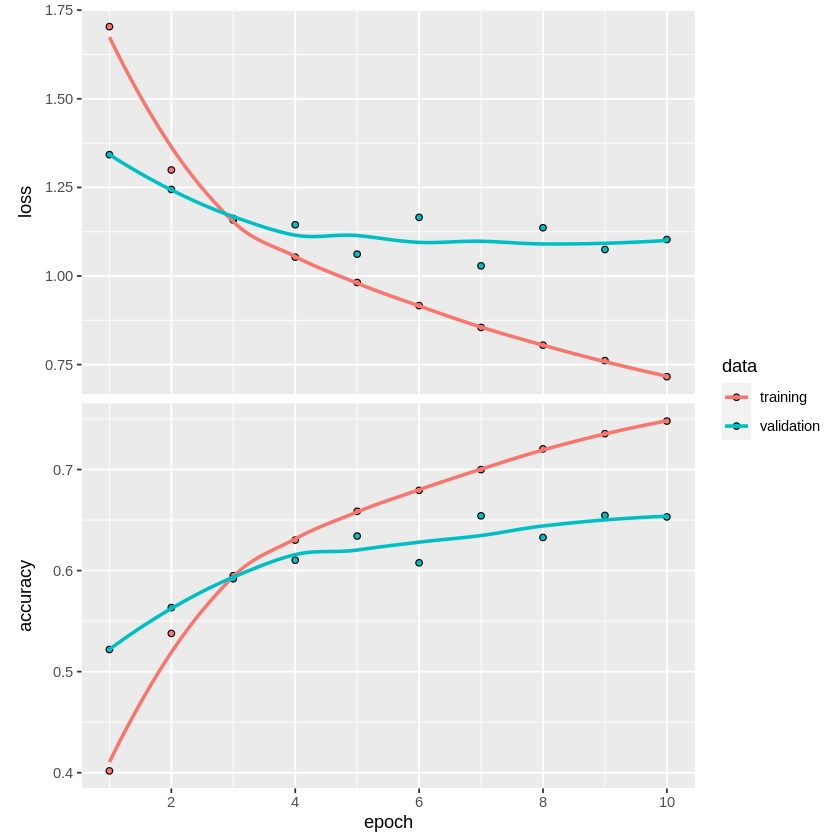

In [40]:
plot(history)

In [39]:
summary(cifar$train$x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    70.0   117.0   120.7   167.0   255.0 

In [41]:
evaluate(model, cifar$test$x, cifar$test$y, verbose = 0)

loss accuracy 
1.102985 0.653100